In [2]:
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt

def print_rectangle(plate_width, plate_height, number_of_circuits, circuits_dimentions, m_factor=40):
    img = Image.new('RGB', (plate_width*m_factor, plate_height*m_factor))
    random_color_list = ['#BFCCB5','#7C96AB','#B7B7B7','#EDC6B1','#FDF4F5',
                             '#E8A0BF','#BA90C6','#C0DBEA','#DDFFBB','#C7E9B0',
                             '#B3C99C','#A4BC92','#B2A4FF','#FFB4B4','#FFDEB4',
                             '#FDF7C3','#FFF2CC','#FFD966','#F4B183','#DFA67B',
                             '#867070','#D5B4B4','#E4D0D0','#F5EBEB','#BBD6B8',
                             '#AEC2B6','#94AF9F','#DBE4C6','#CCD5AE','#E9EDC9',
                             '#FEFAE0','#FAEDCD','#804674','#A86464','#B3E5BE',
                             '#F5FFC9','#F7C8E0','#DFFFD8','#B4E4FF','#95BDFF',
                             '#B9F3E4','#EA8FEA','#FFAACF','#F6E6C2','#B5F1CC',
                             '#6096B4','#93BFCF','#BDCDD6','#EEE9DA','#65647C',
                             '#8B7E74','#C7BCA1','#F1D3B3','#FEBE8C','#ECC5FB']
    for i in range(number_of_circuits):
        w = circuits_dimentions[i][0]*m_factor
        h = circuits_dimentions[i][1]*m_factor
        x = circuits_dimentions[i][2]*m_factor
        y = circuits_dimentions[i][3]*m_factor
        img1 = ImageDraw.ImageDraw(img)
        random_color_list_ = random_color_list
        random_color = random_color_list_.pop()
        if len(random_color_list_) == 0:
            random_color_list_ = random_color_list
        img1.rectangle([(x,y), (x+w, y+h)],fill =random_color, outline ="black", width=1)
        
    #Uncomment to print also a grid

    for i in range(plate_width):
        img1 = ImageDraw.ImageDraw(img)
        img1.line([(i*m_factor,0), (i*m_factor, plate_height*m_factor)], fill='#636363', width=1)
    for i in range(plate_height):
        img1 = ImageDraw.ImageDraw(img)
        img1.line([(0,i*m_factor), (plate_width*m_factor, i*m_factor)], fill='#636363', width=1)
    img.show()

In [22]:
def read_circuits_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    # Parse width and height
    width, height = map(int, lines[0].split())

    # Parse number of circuits
    num_circuits = int(lines[1])

    circuits = []
    for line in lines[2:]:
        if line.strip() != '':
            values = line.split()
            circuit = list(map(int, values[:2]))
            x, y = map(int, values[2:4])
            is_rotated = values[4].lower() == 'true'

            if is_rotated:
                circuit = circuit[::-1]

            circuits.append([circuit[0], circuit[1], x, y])

    return width, height, num_circuits, circuits

Width: 9
Height: 9
Number of circuits: 5
Circuit positions:
[3, 3, 0, 0]
[4, 3, 0, 3]
[5, 3, 4, 3]
[6, 3, 3, 0]
[9, 3, 0, 6]


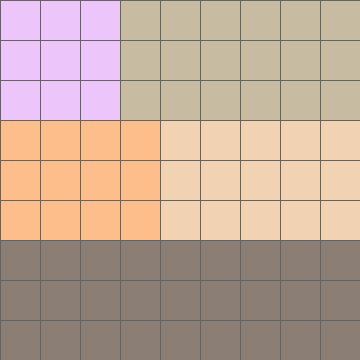

In [26]:
filename = '2.txt'

width, height, num_circuits, circuits = read_circuits_data(filename)

print(f"Width: {width}")
print(f"Height: {height}")
print(f"Number of circuits: {num_circuits}")
print("Circuit positions:")
for circuit in circuits:
    print(circuit)

print_rectangle(width, height, num_circuits, circuits)